In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from wordcloud import WordCloud
import random

In [3]:
df = pd.read_csv('/Users/christopher/Desktop/IronHack/projects/Data Visualization/vgsalesGlobale.csv')

In [4]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


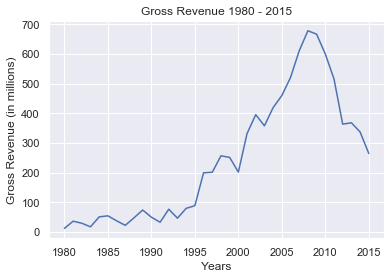

In [41]:
# Trend of gross revenue
df[['Year','Global_Sales']].groupby('Year')['Global_Sales'].agg('sum')
df.query('Year >2015 & Global_Sales < 100').index
df.drop(df.query('Year >2015 & Global_Sales < 100').index, inplace=True)
plt.plot(df[['Year','Global_Sales']].groupby('Year')['Global_Sales'].agg('sum'))
plt.title('Gross Revenue 1980 - 2015')
plt.xlabel('Years')
plt.ylabel('Gross Revenue (in millions)')
plt.savefig('Gross Revenue', dpi=600)

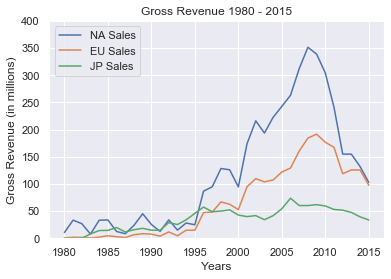

In [44]:
# Same graph but three lines with each sale number
plt.plot(df[['Year','NA_Sales']].groupby('Year')['NA_Sales'].agg('sum'), label = 'NA Sales')
plt.plot(df[['Year','EU_Sales']].groupby('Year')['EU_Sales'].agg('sum'), label = 'EU Sales')
plt.plot(df[['Year','JP_Sales']].groupby('Year')['JP_Sales'].agg('sum'), label = 'JP Sales')
plt.title('Gross Revenue 1980 - 2015')
plt.xlabel('Years')
plt.ylabel('Gross Revenue (in millions)')
plt.legend()
plt.ylim(0,400)
plt.savefig('Gross Revenue Comparitive', dpi=600)

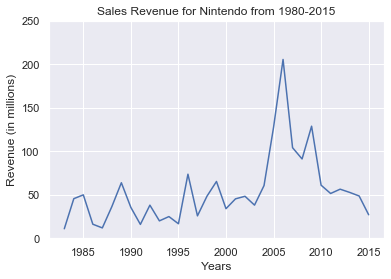

In [65]:
# Running sum of Nintendo sales from 1980-2015
df_Nintendo = df.query('Publisher == "Nintendo"')
df_Nintendo[['Year','Global_Sales']].groupby('Year').agg('sum')
# Plot
plt.plot(df_Nintendo[['Year','Global_Sales']].groupby('Year').agg('sum'))
plt.title('Sales Revenue for Nintendo from 1980-2015')
plt.xlabel('Years')
plt.ylabel('Revenue (in millions)')
plt.ylim(0,250)
plt.savefig('Sales Revenue Nintendo', dpi=600)

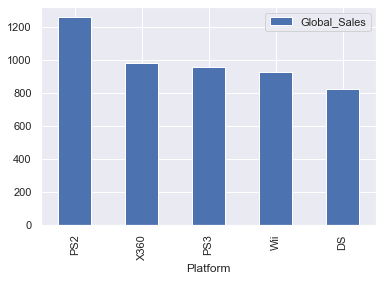

In [210]:
# Look at consoles sale, total and per region
x = df[['Global_Sales','Platform']].groupby('Platform').agg('sum').sort_values('Global_Sales', ascending=False).head(5)
x.plot.bar()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

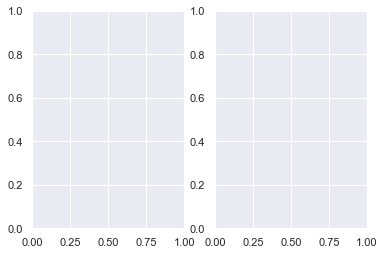

In [183]:
 df[['Global_Sales','Platform']].groupby('Platform').agg('sum').sort_values('Global_Sales', ascending=False).head(5)

,Global_Sales
Platform,
PS2,1255.64
X360,979.96
PS3,957.84
Wii,926.71
DS,822.49


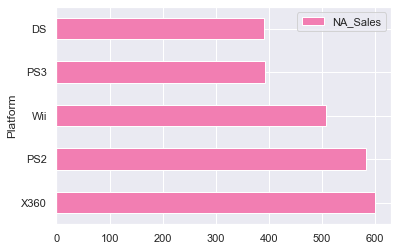

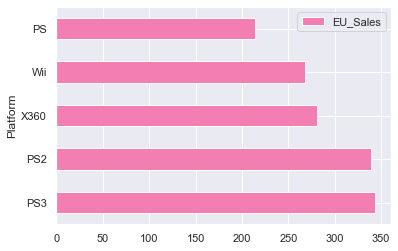

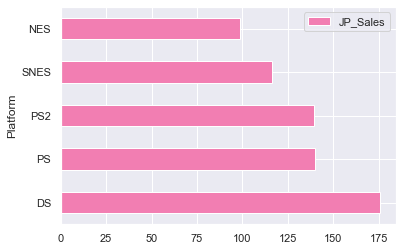

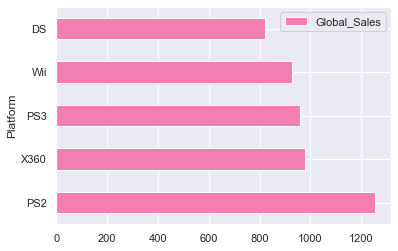

In [220]:
colors = ['#f27eb2', '#559aba','#d2dfe9', '#1c2340']
Sales_List = ['NA_Sales','EU_Sales','JP_Sales','Global_Sales']
for i in Sales_List:
        x = df_platform = df[[i,'Platform']].groupby('Platform').agg('sum').sort_values(i, ascending=False).head(5)
        x.plot.barh(color=colors)
        plt.savefig(f'{i} for Platform',dpi=600,bbox_inches = "tight")

In [67]:
df.query('Year == 2006').sort_values('Global_Sales', ascending=False).head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


In [279]:
# Find top 3 genres
df[['Genre','Global_Sales']].groupby('Genre').agg('sum').sort_values('Global_Sales',ascending=False).head(3)

,Global_Sales
Genre,
Action,1751.18
Sports,1330.93
Shooter,1037.37


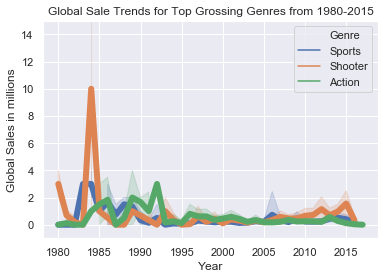

In [235]:
# Create a new df, and find global sale trends for the top 3 genres
df2 = pd.DataFrame(df.loc[(df.Genre=='Sports') | (df.Genre=='Action') | (df.Genre=='Shooter')])
df2['Global_Sales'] = df2['Global_Sales'].astype(int)
colors = ['#f27eb2', '#559aba','#d2dfe9', '#1c2340']
sns.lineplot(x='Year', y='Global_Sales', data=df2, hue=df2.Genre, linewidth=6, color=colors)
plt.ylim(-1,15)
plt.ylabel('Global Sales in millions')
plt.title('Global Sale Trends for Top Grossing Genres from 1980-2015')
plt.savefig('Genre Sales Trends 1980 -2015', dpi=600)

In [67]:
# Why in year 1984 the highest grossing genre was shooters = duck hunt was released
df.query('Year < 1985').sort_values('Global_Sales', ascending=False).head(3)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
89,90,Pac-Man,2600,1982.0,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81
239,240,Pitfall!,2600,1981.0,Platform,Activision,4.21,0.24,0.00,0.05,4.50


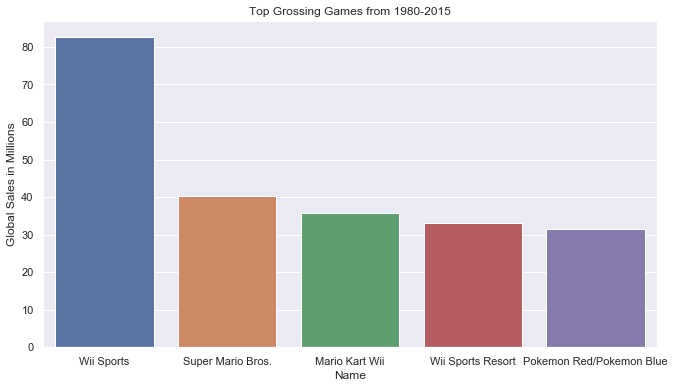

In [273]:
# Top 10 highest grossing games rank and global sales
top_10 = pd.DataFrame(df[['Global_Sales', 'Name']].head(5))
plt.figure(figsize=(11,6))
sns.barplot(x='Name', y='Global_Sales', data=top_10)
plt.title('Top Grossing Games from 1980-2015')
plt.ylabel('Global Sales in Millions')
plt.savefig('Top Grossing Games from 1980-2015', dpi=600)

In [274]:
top_10

,Global_Sales,Name
0,82.74,Wii Sports
1,40.24,Super Mario Bros.
2,35.82,Mario Kart Wii
3,33.00,Wii Sports Resort
4,31.37,Pokemon Red/Pokemon Blue


In [11]:
top_3_genre = df.loc[(df.Genre=='Sports') | (df.Genre=='Action') | (df.Genre=='Shooter')]
top_3_genre.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
13,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00


In [58]:
df_sports

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
13,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
...,...,...,...,...,...,...,...,...,...,...,...
16576,16579,Rugby Challenge 3,XOne,2016.0,Sports,Alternative Software,0.00,0.01,0.00,0.00,0.01
16578,16581,Outdoors Unleashed: Africa 3D,3DS,2011.0,Sports,Mastiff,0.01,0.00,0.00,0.00,0.01
16579,16582,PGA European Tour,N64,2000.0,Sports,Infogrames,0.01,0.00,0.00,0.00,0.01
16581,16584,Fit & Fun,Wii,2011.0,Sports,Unknown,0.00,0.01,0.00,0.00,0.01


In [15]:
df2 = pd.DataFrame(df.loc[(df.Genre=='Sports') | (df.Genre=='Action') | (df.Genre=='Shooter')])
df2.Genre

0         Sports
3         Sports
9        Shooter
13        Sports
14        Sports
          ...   
16583     Action
16585    Shooter
16587     Sports
16589     Action
16594    Shooter
Name: Genre, Length: 6972, dtype: object

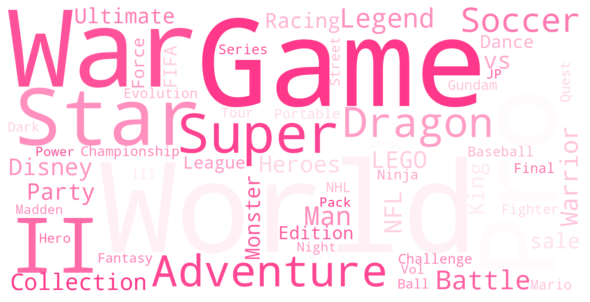

<Figure size 432x288 with 0 Axes>

In [35]:
def word_cloud_img(df):
    wordcloud1 = WordCloud(max_font_size=350, collocations=False, \
                           max_words=60, width=1600, height=800, \
                           background_color="white").generate(' '.join(df.Name))
    def grey_color_func(word, font_size, position, orientation, random_state=None,
                        **kwargs):
        return "hsl(335, 100%%, %d%%)" % random.randint(60, 100)



    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud1.recolor(color_func=grey_color_func), interpolation="bilinear")
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    plt.savefig('Video Game Title Word Cloud', dpi=600)
word_cloud_img(df)

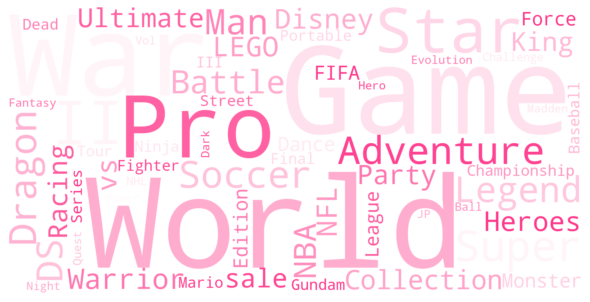

In [12]:
wordcloud1 = WordCloud(max_font_size=350, collocations=False, \
                       max_words=60, width=1600, height=800, \
                       background_color="white").generate(' '.join(df.Name))
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(335, 100%%, %d%%)" % random.randint(60, 100)



plt.figure(figsize=(8,4))
plt.imshow(wordcloud1.recolor(color_func=grey_color_func), interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)

plt.savefig('Video Game Title Word Cloud', dpi=600)